# INTRODUCTION
-- This dataset contains information about movies. The information is drawn from The Movie Database (TMDb).
-- This data is very important to production companies and movie enthusiasts.

## QUESTIONS 
1. How long do most movies last?
2. Are longer movies more popular or less popular?
3. In which year was the highest movie revenue realised?
4. The top 10 highest budget movies
5. The top 10 highest revenue movies
6. How does the popularity of a movie relate with its revenue
7. Do high budget movies also generate high revenue?
8. What are the most produced genres?
9. Which combination of genres produces the highest revenue?
10. Which combination of genres is the most popular?

In [32]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter # is for counting hashable objects.
from wordcloud import WordCloud # is for visualizing keywords in a nice way.
from scipy.stats.stats import pearsonr

In [2]:
# Loading the dataset

df_movie =pd.read_csv("tmdb-movies.csv")
# Displaying the first 5 rows of the data
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## TO DO
1.Do a data overview and investige the data attributes 
2.Ask questions
3.Assess the data
4.Clean the data(column heads, remove missing values, duplicates)
5.Inspect the datatypes and fix the datatypes issues
6.Explore with visuals and draw conclusions with visuals
7.Conclude

##### Finding out the dimension of the dataframe
##### use the df.shape

In [5]:
df_movie.shape

(10866, 21)

#### -This movie dataset has 10866 rows and 21 columns

##### Understanding the summary of the dataframe
##### use the df.info function


In [6]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

- This df has 6 integer datatypes, 4 floats and 11 object datatypes
- There are 10866 rows. 
- imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production companies have some missing values.

# DATA CLEANING

##### -- There are columns which are not needed in the analysis. Dropping these columns will not affect our analysis. 
##### -- These columns include: homepage overview, release_date, tagline, keywords

In [7]:
df_movie.drop(['homepage', 'overview', 'tagline','release_date', 'id', 'keywords'], axis=1, inplace=True)

df_movie.head()

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


### Handling Missing Values
-- Drop the rows with missing values.

In [8]:
# checking for missing values
df_movie.isnull().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
# Dropping the missing values
df_movie.dropna(inplace=True)

In [10]:
# Confirming if any column still has missing values
df_movie.isnull().sum().any()

False

### Handling Duplicates


In [11]:
# Cheking the number of duplicates
sum(df_movie.duplicated())

1

In [12]:
# Dropping the duplicates
df_movie.drop_duplicates(inplace = True)

In [13]:
# Confirming if any column still has duplicate values
df_movie.duplicated().any()

False

In [14]:
df_movie.shape

(9770, 15)

-- After dropping all the missing values and the duplicates, the dataframe has remained with 9770 rows and 16 columns

### Inspecting datatypes

In [15]:
df_movie.dtypes

imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [16]:
# investigating the unique values of the revenue column
df_movie['revenue'].unique()

array([1513528810,  378436354,  295238201, ...,     321952,   78000000,
         33736689], dtype=int64)

In [17]:
df_movie.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9770.000000,9.770000e+03,9.770000e+03,9770.000000,9770.000000,9770.000000,9770.000000,9.770000e+03,9.770000e+03
mean,0.694775,1.618298e+07,4.424026e+07,102.939611,239.353224,5.963388,2000.876766,1.941997e+07,5.706477e+07
std,1.037027,3.221320e+07,1.225998e+08,27.865500,603.066348,0.913207,13.037610,3.566891e+07,1.514632e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.232620,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.179631e+05,0.000000e+00
75%,0.776465,1.936250e+07,3.105779e+07,112.000000,173.000000,6.600000,2011.000000,2.467646e+07,4.312856e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


##### -- we should drop the values of budget and revenue which are unrealistic
###### -- A movie can not realistically have a budget being 0. Similarly having a revenue of 0 is unrealistic. We should therefore drop rows that the budget and revenue is 0.

                                                     

In [18]:
# Dropping the unrealistic budget  values
df_movie.drop(df_movie[df_movie['budget'] == 0].index, inplace = True)

In [19]:
# Dropping the unrealistic revenue values
df_movie.drop(df_movie[df_movie['revenue'] == 0].index, inplace = True)

In [27]:
df_movie.shape

(3805, 17)

##### -- Our clean dataframe has 3805 rows and 17 columns

# Exploratory Data Analysis

#### -- Our data is now clean and we can explore and create visualizations so as to answer the questions we have posed in the introduction.

# 1. How long do most movies last?

##### The length of a movie is something movie lovers often consider before watching any movie. Acording to an article published by Rotten Tomatoes(https://editorial.rottentomatoes.com/article/longer-movies-are-better-according-to-the-tomatometer/), longer movies(runtime is more than 140 minuts) are better.
##### After understanding how long movies last, we shall ask the question which movies are better rated between shorter and longer movies.

###### According to imdb, a standard movie runs for 40 minutes. Is this the case for the movies being produced?

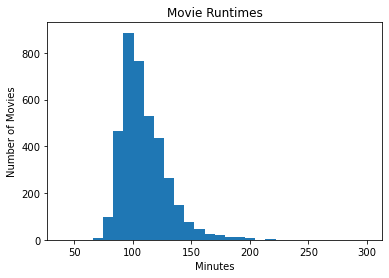

In [30]:
# visualizing the runtime most movies have
#df_movie_runtime= df_movie[df_movie['runtime'] > 140]

plt.hist(df_movie['runtime'], range = (40,300), bins = 30)
plt.title('Movie Runtimes')
plt.xlabel("Minutes")
plt.ylabel("Number of Movies")
plt.show()

##### The highest bar of the histogram is at 90 minutes. This means that most movies run for 90 minutes.


##### We shall plot a boxplot so as to view the summary statistics of the runtime column 
##### and so as to see the extreme points in runtime(Outliers)

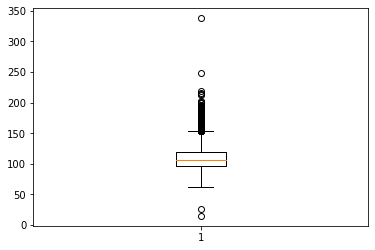

In [35]:
plt.boxplot(df_movie['runtime']);

#### From the boxplot above, we gather that :

#### 1. 0.25 of the movies have a runtime of less than 95 minutes.
#### 2. 0.5 of the movies have a runtime of less than 105 minutes.
#### 3. 0.75 of the movies have a runtime of less than 120 minutes.
#### 4. Outliers ( points on the extreme ends) are  present.

##### Summary statistics for runtime using the describe function so as to see the accurate values of the quartiles and the mean, min and max of runtime

In [21]:
df_movie['runtime'].describe()

count    3805.000000
mean      109.351117
std        19.845678
min        15.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

# 2. Are longer movies more popular or less popular?

#### We shall split the dataset into 2 using the median runtime. 
#### Shorter movies will have a runtime of less than 100 minutes while longer movies will have a runtime longer than 100 minutes.
#### We shall then groupby using popularity to see whether longer movies or shorter movies are preferred.

In [50]:
# Extracting the movies that have a runtime greater than 100 minutes
shorter_movies = df_movie.query('runtime > 100')

# Extracting the movies that have a runtime greater than 100 minutes
longer_movies = df_movie.query('runtime < 100')


In [57]:
shorter_movies.groupby('original_title')['popularity'].mean()

original_title
10,000 BC                  1.841839
101 Dalmatians             1.419885
10th & Wolf                0.384988
12 Rounds                  0.826039
12 Years a Slave           3.625529
                             ...   
xXx                        1.936728
xXx: State of the Union    1.405588
Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´       0.010335
ÐÐ´Ð¼Ð¸Ñ€Ð°Ð»ÑŠ            0.427023
ã‚¢ãƒƒãƒ—ãƒ«ã‚·ãƒ¼ãƒ‰      0.845493
Name: popularity, Length: 2321, dtype: float64

In [58]:
longer_movies.groupby('original_title')['popularity'].mean()

original_title
(500) Days of Summer          3.244139
10 Things I Hate About You    1.769152
127 Hours                     2.440611
13 Going On 30                1.497252
2 Days in New York            0.383998
                                ...   
Zombieland                    2.041804
Zoolander                     1.581446
Zoom                          0.529881
eXistenZ                      0.501242
Ã†on Flux                     2.220063
Name: popularity, Length: 1332, dtype: float64

##### create scatterplot of runtime vs. popularity. The  scatter plot will help us understand the relationship between the runtime and the popularity of movies

Text(0, 0.5, 'popularity')

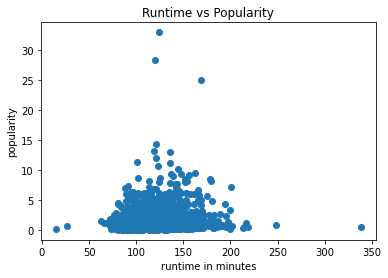

In [26]:
plt.scatter(df_movie.runtime, df_movie.popularity)
plt.title('Runtime vs Popularity')
plt.xlabel('runtime in minutes')
plt.ylabel('popularity')

##### We plot a regplot so as to know the linear trend between runtime and popularity.

<AxesSubplot:xlabel='runtime', ylabel='popularity'>

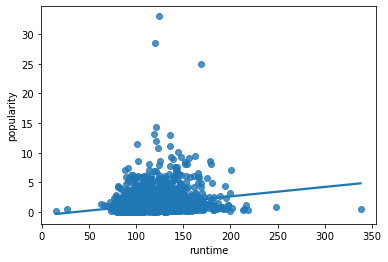

In [30]:
sns.regplot(x = "runtime", y = "popularity", data= df_movie, dropna = True, ci= None)

In [29]:
# Calculating a correlation coefficient between runtime and popularity of movies.
correlation = df_movie['runtime'].corr(df_movie['popularity'])
correlation


0.2136903062554136

#### -- The correlation coefficient equals 0.2136903062554136. This is less than 0.5 thus showing that there is a weak relationship between runtime and popularity of movies.

### --Number of movies produced per year

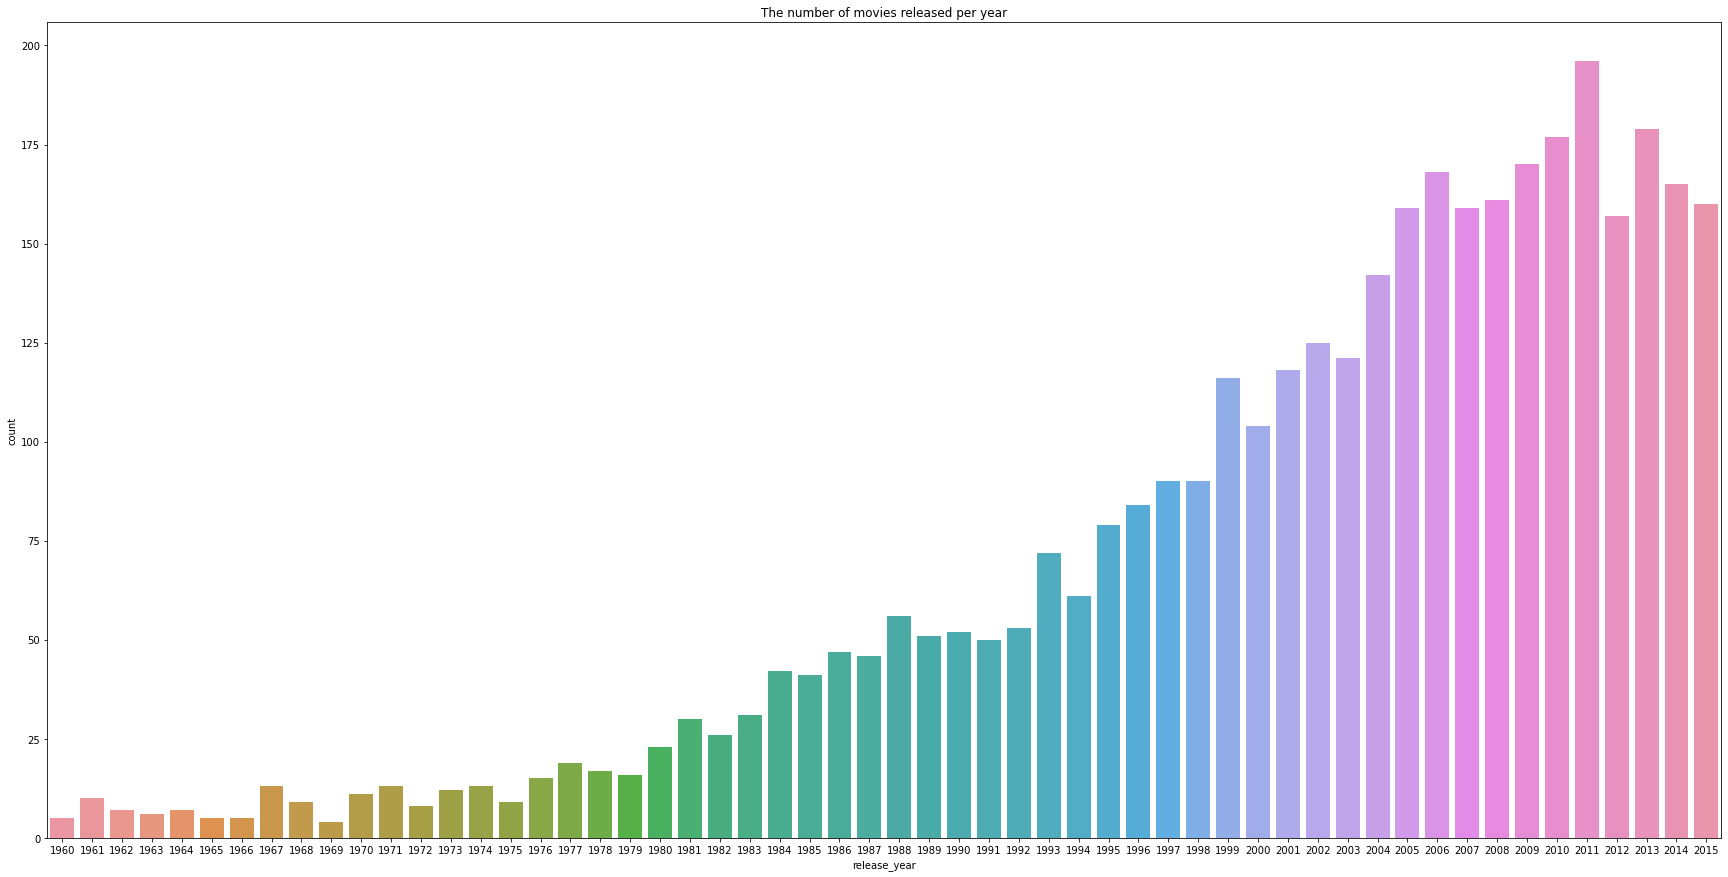

In [44]:
plt.figure(figsize=(30,15))
sns.countplot(x = 'release_year', data= df_movie )
plt.title('The number of movies released per year')
plt.show;

-- We can see that 2011 is the year when most movies were released.

# 3. which is the year with the highest movie revenue

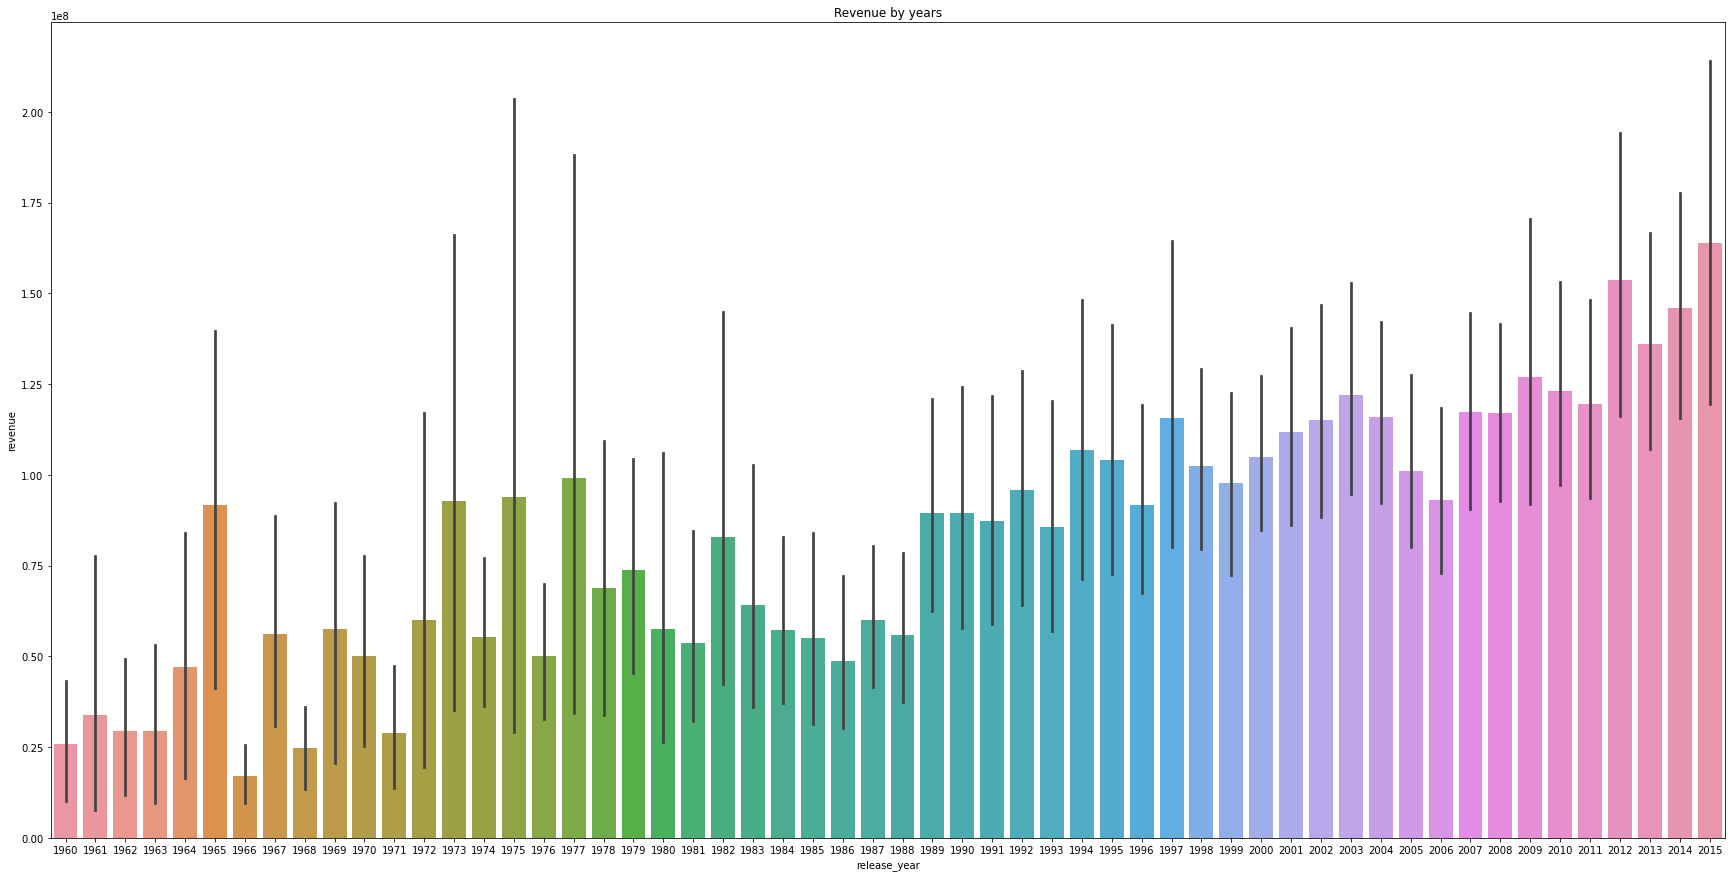

In [31]:
plt.figure(figsize=(30,15))
sns.barplot(x ='release_year', y = 'revenue', data = df_movie)
plt.title("Revenue by years")
plt.show;

-- Despite most movies being released in 2011, 2015 is the year when the highest movie revenues were generated.

This could have been as a result of better production techniques, better marketing of the movies and better and more strategic distribution of the movies.

# 4.The top 10 highest budget movies

In [38]:
top10_budget_movies = df_movie.nlargest(10, "budget")[['original_title', 'budget']].set_index('original_title')
top10_budget_movies

,budget
original_title,
The Warrior's Way,425000000
Pirates of the Caribbean: On Stranger Tides,380000000
Pirates of the Caribbean: At World's End,300000000
Avengers: Age of Ultron,280000000
Superman Returns,270000000
Tangled,260000000
John Carter,260000000
Spider-Man 3,258000000
The Lone Ranger,255000000


<AxesSubplot:xlabel='budget', ylabel='original_title'>

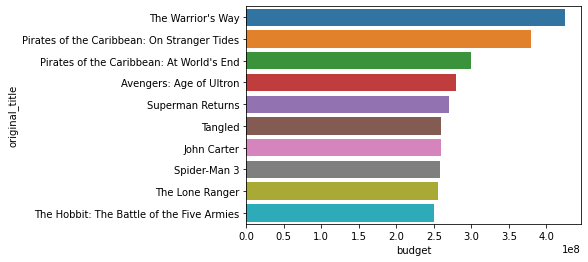

In [39]:
sns.barplot(x = 'budget', y = top10_budget_movies.index, data = top10_budget_movies )

# 5. The top 10 highest revenue movies

In [38]:
top10_revenue_movies = df_movie.nlargest(10, "revenue")[['original_title', 'revenue']].set_index('original_title')
top10_revenue_movies

,revenue
original_title,
Avatar,2781505847
Star Wars: The Force Awakens,2068178225
Titanic,1845034188
The Avengers,1519557910
Jurassic World,1513528810
Furious 7,1506249360
Avengers: Age of Ultron,1405035767
Harry Potter and the Deathly Hallows: Part 2,1327817822
Frozen,1274219009


<AxesSubplot:xlabel='revenue', ylabel='original_title'>

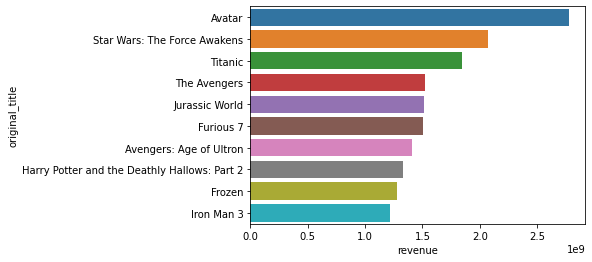

In [40]:
sns.barplot(x = 'revenue', y = top10_revenue_movies.index, data = top10_revenue_movies )

##### --Avatar is the movie that genearated the most revenue

### -Average rating of movies per year

In [46]:
df_movie.groupby('release_year')['popularity'].mean().sort_values(ascending = False)

release_year
2015    2.856943
2014    2.523676
2012    1.417230
2013    1.403043
1964    1.377790
1975    1.369447
1960    1.324513
1977    1.267286
1979    1.240415
1994    1.234534
2011    1.217316
2003    1.203182
1972    1.195410
2010    1.184717
2009    1.168051
1969    1.152940
2004    1.146454
2008    1.119292
2002    1.099752
2001    1.082063
1995    1.060945
1965    1.054877
1963    1.040612
2007    1.030339
1982    1.026134
1989    1.024169
2005    1.019083
1973    1.006149
1997    1.000009
1980    0.986323
1971    0.983619
1962    0.983485
2006    0.974851
1999    0.957547
1967    0.953848
1998    0.945580
1984    0.932410
1996    0.922828
1985    0.922242
1974    0.915038
1968    0.913463
1992    0.889951
1976    0.889930
2000    0.857735
1987    0.854185
1990    0.848044
1983    0.813301
1993    0.796504
1961    0.787718
1991    0.785681
1981    0.773135
1978    0.759471
1986    0.713404
1988    0.687013
1970    0.565886
1966    0.395168
Name: popularity, dtype: float64

#####  -- Movies released in 2015 are more popular.

# 6.How does the popularity of the movie affect its revenue?

##### we will plot the scatterplot of popularity and revenue and analyze the correlation.

<AxesSubplot:xlabel='revenue', ylabel='popularity'>

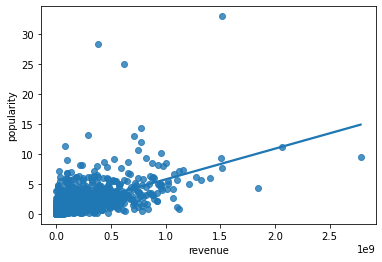

In [31]:
sns.regplot(x = 'revenue', y= 'popularity', data = df_movie, ci = None)

##### -- From the regplot, we can see there is positive correlation between the popularity and revenue.
##### -- This means that more popular movies also genearate a high amount of revenue.

##### ** We shall calculate the correlarion coefficient so as to how srong is the relationship between revenue and popularity

In [33]:
correlation = df_movie['revenue'].corr(df_movie['popularity'])
correlation

0.6137927757114431

#### -- The correlation coefficient equals 0.6137927757114431.
#### --This is more than 0.5 thus showing that there is a strong correlation between revenue and popularity of movies.

# 7. Do high budget movies also generate a high revenue?

#### -- We shall plot the reg plot between budget and revenue so that we can easily visualize the relationship between the budget and revenue.
#### -- We shall then calculate the correlation coefficient so that we can understand how strong the relationship is.

<AxesSubplot:xlabel='budget', ylabel='revenue'>

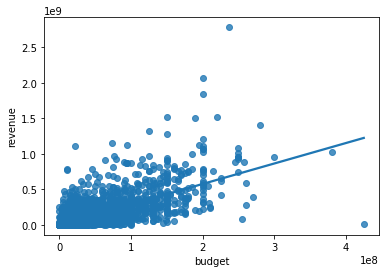

In [35]:
sns.regplot(x = 'budget', y= 'revenue', data = df_movie, ci = None)

#### --* The regplot shows a positive correlation between budget and revenue.

In [36]:
# calculating the correlation coeficient.

correlation = df_movie['budget'].corr(df_movie['revenue'])
correlation

0.6870586165480226

#### We shall calculate the correlation coefficient so as to know how stong the correlation between budget and revenue is 

#### --** The correlation coefficient equals 0.6870586165480226.
#### --** This is more than 0.5 thus showing that there is a strong correlation between budget and revenue of movies.

# 8. What genres are most produced?

##### --genres column has values separated by "|". We will need to split the values first.

In [54]:
# Separating the values. It will give a 2-D list which we will need to convert to 1-D list later

genres_list1 = []
for value in df_movie['genres']:
    genres_list1.append(value.split('|'))
    
genres_list1 

[['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Fantasy'],
 ['Action', 'Crime', 'Thriller'],
 ['Western', 'Drama', 'Adventure', 'Thriller'],
 ['Science Fiction', 'Action', 'Thriller', 'Adventure'],
 ['Drama', 'Adventure', 'Science Fiction'],
 ['Family', 'Animation', 'Adventure', 'Comedy'],
 ['Comedy', 'Animation', 'Family'],
 ['Action', 'Adventure', 'Crime'],
 ['Science Fiction', 'Fantasy', 'Action', 'Adventure'],
 ['Drama', 'Science Fiction'],
 ['Action', 'Comedy', 'Science Fiction'],
 ['Action', 'Adventure', 'Science Fiction'],
 ['Crime', 'Drama', 'Mystery', 'Western'],
 ['Crime', 'Action', 'Thriller'],
 ['Science Fiction', 'Action', 'Adventure'],
 ['Romance', 'Fantasy', 'Family', 'Drama'],
 ['War', 'Adventure', 'Science Fiction'],
 ['Action', 'Family', 'Science Fiction', 'Adventure', 'Mystery'],
 ['Action', 'Drama'],
 ['Action'

In [55]:
# Coverting the 2-D list to 1-D

genres_list2 = []
for genre in genres_list1:
    for genres in genre:
        genres_list2.append(genres)
        
genres_list2

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Action',
 'Adventure',
 'Science Fiction',
 'Fantasy',
 'Action',
 'Crime',
 'Thriller',
 'Western',
 'Drama',
 'Adventure',
 'Thriller',
 'Science Fiction',
 'Action',
 'Thriller',
 'Adventure',
 'Drama',
 'Adventure',
 'Science Fiction',
 'Family',
 'Animation',
 'Adventure',
 'Comedy',
 'Comedy',
 'Animation',
 'Family',
 'Action',
 'Adventure',
 'Crime',
 'Science Fiction',
 'Fantasy',
 'Action',
 'Adventure',
 'Drama',
 'Science Fiction',
 'Action',
 'Comedy',
 'Science Fiction',
 'Action',
 'Adventure',
 'Science Fiction',
 'Crime',
 'Drama',
 'Mystery',
 'Western',
 'Crime',
 'Action',
 'Thriller',
 'Science Fiction',
 'Action',
 'Adventure',
 'Romance',
 'Fantasy',
 'Family',
 'Drama',
 'War',
 'Adventure',
 'Science Fiction',
 'Action',
 'Family',
 'Science Fiction',
 'Adventure',
 'Mystery',
 'Action',
 'Drama',
 

In [56]:
# Counting how many films of each genre were produced

Counter(genres_list2)

Counter({'Action': 1076,
         'Adventure': 743,
         'Science Fiction': 517,
         'Thriller': 1194,
         'Fantasy': 395,
         'Crime': 649,
         'Western': 52,
         'Drama': 1729,
         'Family': 417,
         'Animation': 199,
         'Comedy': 1335,
         'Mystery': 343,
         'Romance': 658,
         'War': 119,
         'History': 128,
         'Music': 131,
         'Horror': 459,
         'Documentary': 26,
         'Foreign': 9,
         'TV Movie': 1})

<AxesSubplot:>

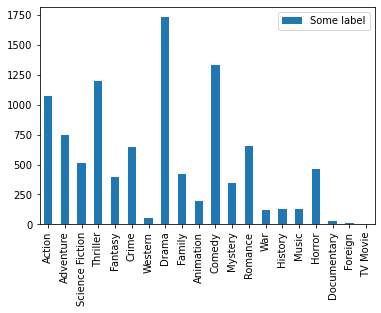

In [57]:
df1 = pd.DataFrame.from_dict(Counter(genres_list2), orient='index', columns=['Some label'])
df1.plot.bar()

## --Drama movies were the most produced movies.

# 9. Which combination of genres produces the highest revenue?

In [64]:
top10_revenue_genres = df_movie.nlargest(10, "revenue")[['genres', 'revenue']].set_index('genres')
top10_revenue_genres

,revenue
genres,
Action|Adventure|Fantasy|Science Fiction,2781505847
Action|Adventure|Science Fiction|Fantasy,2068178225
Drama|Romance|Thriller,1845034188
Science Fiction|Action|Adventure,1519557910
Action|Adventure|Science Fiction|Thriller,1513528810
Action|Crime|Thriller,1506249360
Action|Adventure|Science Fiction,1405035767
Adventure|Family|Fantasy,1327817822
Animation|Adventure|Family,1274219009


<AxesSubplot:xlabel='revenue', ylabel='genres'>

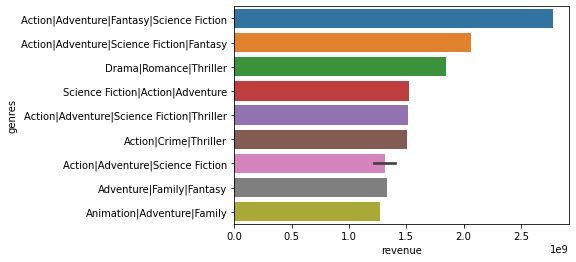

In [65]:
sns.barplot(x = 'revenue', y = top10_revenue_genres.index, data = top10_revenue_genres )

# 10. Which combination of genres is the most popular?

In [66]:
top10_popular_genres = df_movie.nlargest(10, "popularity")[['genres', 'popularity']].set_index('genres')
top10_popular_genres

,popularity
genres,
Action|Adventure|Science Fiction|Thriller,32.985763
Action|Adventure|Science Fiction|Thriller,28.419936
Adventure|Drama|Science Fiction,24.949134
Action|Science Fiction|Adventure,14.311205
Adventure|Science Fiction|Thriller,13.112507
Action|Adventure|Science Fiction,12.971027
Adventure|Action|Science Fiction,12.037933
Action|Thriller,11.422751
Action|Adventure|Science Fiction|Fantasy,11.173104


<AxesSubplot:xlabel='popularity', ylabel='genres'>

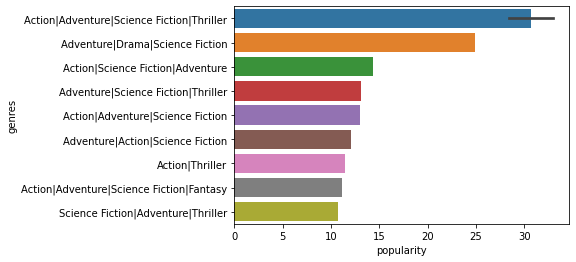

In [67]:
sns.barplot(x = 'popularity', y = top10_popular_genres.index, data = top10_popular_genres )

# CONCLUSION
1. More popular moves generate more revenue. This is because the more popular a movie is, the more people will prefer watching it.  
2. The runtime of a movie does not necessarily affect its popularity.
3. High budget movies also generate high amount of revenue.
4. Action|Adventure|Fantasy|Science Fiction	is the highest combination genre revenue producer
5. Action|Adventure|Science Fiction|Thriller is the most popular genre combination.

# ADVICE TO PRODUCTION COMPANIES
1. Production companies should invest in production of movies as high budget movies also produce a high revenue.
2. Production companies should invest in marketing and distribution of movies they produce as more popular movies generate more revenue.


# DATA LIMITATIONS
Our dataset was insufficient to draw conclusions from due to the following reasons:
1. The dataset contained irrevant columns(columns that were unnecessary for the analysis)
2. The dataset had many missing values. It also had many 0 values for columns such as revenue and budget which was unrealistic.After cleaning dataset, the data left was insufficient.
3. The data is quite outdated. 

# REFERENCES
1. pandas documentation (https://pandas.pydata.org/docs/user_guide/index.html)
2. Matplotlib documentation (https://matplotlib.org/stable/tutorials/index)
3. Pandas material available on kaggle.com (https://www.kaggle.com/learn/pandas)
